#CNN - CONVOLUTIONAL NEURAL NETWORK
###IP(IMAGE) --> (Conv2D+Relu)* --> Pooling --> FC -->OP

##IMAGE TO PIXEL

In [ ]:
from PIL import Image
import numpy as np


image = Image.open("/content/download.png")

image = image.convert("L") #L-GRAYSCALE(1 CHANNEL) AND "RGB" - 3 CHANNEL

pixel_values = np.array(image)

print(pixel_values)

width, height = image.size
print(f"Width: {width}, Height: {height}")


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Width: 251, Height: 201


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
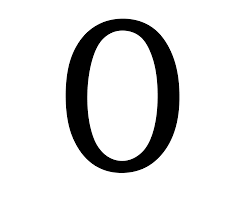

In [ ]:
image

##IMAGE * KERNEL

WITH PADDING

In [ ]:
import numpy as np
from PIL import Image


image = np.array(image)

kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

stride = 1
padding = 1

def conv2d(image, kernel, stride, padding):
    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape

    out_h = (img_h - kernel_h + 2 * padding) // stride + 1
    out_w = (img_w - kernel_w + 2 * padding) // stride + 1

    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)


    output = np.zeros((out_h, out_w))

    for i in range(0, out_h):
        for j in range(0, out_w):
            region = image[i * stride:i * stride + kernel_h, j * stride:j * stride + kernel_w]
            output[i, j] = np.sum(region * kernel)

    assert output.shape == (out_h, out_w), (
        f"Output shape mismatch: Expected ({out_h}, {out_w}), got {output.shape}"
    )
    print(f"Expected Output Dimensions: ({out_h}, {out_w})")
    print(f"Actual Output Dimensions: {output.shape}")

    return image.shape, kernel.shape, (out_h, out_w), output.shape,output

input_dim, kernel_dim, expected_dim, actual_dim,output  = conv2d(image, kernel, stride, padding)

print("Input Image (as Pixel Values):\n", image)
print("\nKernel:\n", kernel)
print("Output Image (as Pixel Values):\n", output)

print(f"Input Dimensions: {image.shape}")
print(f"Kernel Dimensions: {kernel.shape}")
print(f"Expected Output Dimensions:",expected_dim)
print(f"Actual Output Dimensions: {actual_dim}")

Expected Output Dimensions: (201, 251)
Actual Output Dimensions: (201, 251)
Input Image (as Pixel Values):
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]

Kernel:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
Output Image (as Pixel Values):
 [[-510.    0.    0. ...    0.    0.  510.]
 [-765.    0.    0. ...    0.    0.  765.]
 [-765.    0.    0. ...    0.    0.  765.]
 ...
 [-765.    0.    0. ...    0.    0.  765.]
 [-765.    0.    0. ...    0.    0.  765.]
 [-510.    0.    0. ...    0.    0.  510.]]
Input Dimensions: (201, 251)
Kernel Dimensions: (3, 3)
Expected Output Dimensions: (201, 251)
Actual Output Dimensions: (201, 251)


WITHOUT PADDING

In [ ]:
import numpy as np
from PIL import Image


image = np.array(image)


kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

stride = 1
padding = 0

def conv2d(image, kernel, stride, padding):
    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape


    out_h = (img_h - kernel_h + 2 * padding) // stride + 1
    out_w = (img_w - kernel_w + 2 * padding) // stride + 1

    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    output = np.zeros((out_h, out_w))

    for i in range(0, out_h):
        for j in range(0, out_w):
            region = image[i * stride:i * stride + kernel_h, j * stride:j * stride + kernel_w]
            output[i, j] = np.sum(region * kernel)

    assert output.shape == (out_h, out_w), (
        f"Output shape mismatch: Expected ({out_h}, {out_w}), got {output.shape}"
    )
    print(f"Expected Output Dimensions: ({out_h}, {out_w})")
    print(f"Actual Output Dimensions: {output.shape}")

    return image.shape, kernel.shape, (out_h, out_w), output.shape,output

input_dim, kernel_dim, expected_dim, actual_dim,output  = conv2d(image, kernel, stride, padding)


print("Input Image (as Pixel Values):\n", image)
print("\nKernel:\n", kernel)
print("Output Image (as Pixel Values):\n", output)

print(f"Input Dimensions: {image.shape}")
print(f"Kernel Dimensions: {kernel.shape}")
print(f"Expected Output Dimensions:",expected_dim)
print(f"Actual Output Dimensions: {actual_dim}")

Expected Output Dimensions: (199, 249)
Actual Output Dimensions: (199, 249)
Input Image (as Pixel Values):
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]

Kernel:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
Output Image (as Pixel Values):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Input Dimensions: (201, 251)
Kernel Dimensions: (3, 3)
Expected Output Dimensions: (199, 249)
Actual Output Dimensions: (199, 249)


##NORMALIZATION

In [ ]:
def batch_normalization(output, epsilon=1e-5):

    batch_mean = np.mean(output)
    batch_var = np.var(output)

    output_normalized = (output - batch_mean) / np.sqrt(batch_var + epsilon)

    gamma = np.ones_like(output_normalized)  # Initialize gamma to 1
    beta = np.zeros_like(output_normalized)  # Initialize beta to 0

    output_bn = gamma * output_normalized + beta

    return output_bn


output_bn = batch_normalization(output)

print("Batch Normalized Output:")
print(output_bn)

Batch Normalized Output:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##POOLING


MAX POOLING

In [ ]:
import numpy as np

def max_pooling(output, pool_size=2, stride=2):
    h, w = output.shape

    out_h = (h - pool_size) // stride + 1
    out_w = (w - pool_size) // stride + 1

    pooled_output = np.zeros((out_h, out_w))

    for i in range(0, out_h):
        for j in range(0, out_w):
            region = output[i * stride:i * stride + pool_size, j * stride:j * stride + pool_size]
            pooled_output[i, j] = np.max(region)

    return pooled_output

pooled_output = max_pooling(output_bn)

print("Max Pooled Output:")
print(pooled_output)
print(pooled_output.shape)

Max Pooled Output:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(99, 124)


In [ ]:
P = 2  # Pooling window size
S = 2  # Stride

def max_pooling(input_matrix, P, S):
    H, W = input_matrix.shape
    H_out = (H - P) // S + 1
    W_out = (W - P) // S + 1

    output_matrix = np.zeros((H_out, W_out))

    for i in range(H_out):
        for j in range(W_out):
            region = input_matrix[i*S:i*S+P, j*S:j*S+P]

            output_matrix[i, j] = np.max(region)

    return output_matrix


def average_pooling(input_matrix, P, S):
    H, W = input_matrix.shape

    H_out = (H - P) // S + 1
    W_out = (W - P) // S + 1


    output_matrix = np.zeros((H_out, W_out))


    for i in range(H_out):
        for j in range(W_out):

            region = input_matrix[i*S:i*S+P, j*S:j*S+P]

            output_matrix[i, j] = np.mean(region)

    return output_matrix


max_pooling_output = max_pooling(output_bn, P, S)


average_pooling_output = average_pooling(output_bn, P, S)


print("\nMax Pooling Output:")
print(max_pooling_output)

print("\nAverage Pooling Output:")
print(average_pooling_output)




Max Pooling Output:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Average Pooling Output:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
max_pooling_output = max_pooling_output.astype(np.uint8)
im = Image.fromarray(max_pooling_output)


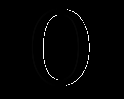

In [ ]:
im

In [ ]:
average_pooling_output = average_pooling_output.astype(np.uint8)
ima = Image.fromarray(average_pooling_output)

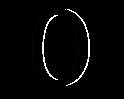

In [ ]:
ima